## 1. Dataset
----

In [1]:
# !git clone -o StrictHostKeyChecking=no https://github.com/alexeygrigorev/clothing-dataset-small.git

## 2. Configurations
----

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
!pip install tensorflow


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [4]:
import tensorflow as tf
from tensorflow import keras

2025-11-22 17:33:24.833800: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-22 17:33:48.015151: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-22 17:34:03.537915: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [5]:
from tensorflow.keras.preprocessing.image import load_img

In [6]:
path = './clothing-dataset-small/train/t-shirt/'
name = '0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg'
fullname = f'{path}/{name}'

In [7]:
img = load_img(fullname, target_size=(299,299))

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

## 3. Pre-trained convulotional neural networks
----

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
model = Xception(
    weights='imagenet',
    input_shape=(299,299,3)
)

2025-11-22 17:34:11.345436: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
X = np.array([x])

In [12]:
X.shape

(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [15]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.9524979)),
  ('n04370456', 'sweatshirt', np.float32(0.009788689)),
  ('n04033995', 'quilt', np.float32(0.0031949775)),
  ('n03710637', 'maillot', np.float32(0.0012328895)),
  ('n03188531', 'diaper', np.float32(0.001185509))]]

## 4. Tranfer learning
----

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [18]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150,150), 
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [19]:
X, y = next(train_ds)

In [20]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation', 
    target_size=(150,150), 
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [21]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [22]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [23]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5


2025-11-22 17:34:35.064488: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 22429696 exceeds 10% of free system memory.
2025-11-22 17:34:35.081730: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 42467328 exceeds 10% of free system memory.
2025-11-22 17:34:35.169202: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 42467328 exceeds 10% of free system memory.
2025-11-22 17:34:35.169279: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 21233664 exceeds 10% of free system memory.
2025-11-22 17:34:35.200868: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 84934656 exceeds 10% of free system memory.


96/96 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.6731 - loss: 1.2607 - val_accuracy: 0.7507 - val_loss: 0.9966
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8064 - loss: 0.6221 - val_accuracy: 0.7889 - val_loss: 0.8603
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.8787 - loss: 0.3554 - val_accuracy: 0.8006 - val_loss: 0.8178
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9006 - loss: 0.2902 - val_accuracy: 0.7830 - val_loss: 0.9307
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9364 - loss: 0.1856 - val_accuracy: 0.8182 - val_loss: 0.8820


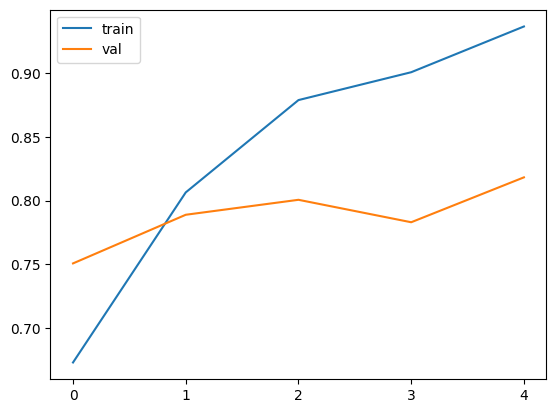

In [24]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(5))
plt.legend()

## 5. Learning rate
----

In [25]:
def make_model(learning_rate=0.01):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    ##############################################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    ##############################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
        )

    return model

In [26]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.3928 - loss: 1.8329 - val_accuracy: 0.5279 - val_loss: 1.5538
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.5711 - loss: 1.3415 - val_accuracy: 0.6217 - val_loss: 1.2298
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.6392 - loss: 1.1116 - val_accuracy: 0.6833 - val_loss: 1.0562
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.6838 - loss: 0.9798 - val_accuracy: 0.7155 - val_loss: 0.9559
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.7040 - loss: 0.8919 - val_accuracy: 0.7537 - val_loss: 0.8843
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.7327 - loss: 0.8275 - val_accuracy: 0.7683 - val_loss: 0.8301
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.7451 - loss: 0.7778 - val_accuracy: 0.7742 - val_loss: 0.7915
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.7595 - loss: 0.7369 - val_accuracy: 0.7

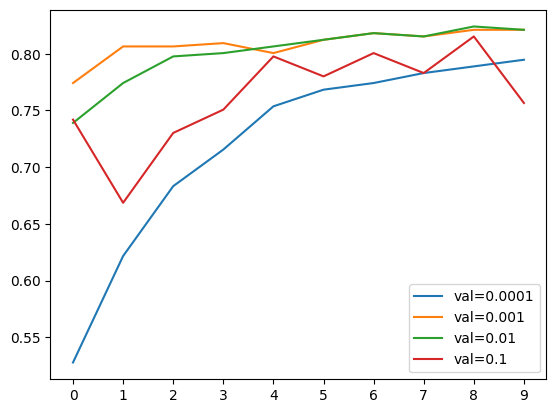

In [27]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=(f'train={lr}'))
    plt.plot(hist['val_accuracy'], label=(f'val={lr}'))
    
plt.xticks(np.arange(10))
plt.legend()

In [28]:
learning_rate = 0.001

## 6. Checkpointing
----

In [31]:
model.save_weights('model_v1.weights.h5')

In [32]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
    )

In [33]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds, 
    epochs=10, 
    validation_data=val_ds,
    callbacks=[checkpoint]
    )

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5100 - loss: 1.4775

96/96 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.6258 - loss: 1.1056 - val_accuracy: 0.7713 - val_loss: 0.7334
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7772 - loss: 0.6780

96/96 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.7894 - loss: 0.6287 - val_accuracy: 0.7918 - val_loss: 0.6398
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8470 - loss: 0.5061

96/96 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.8390 - loss: 0.5082 - val_accuracy: 0.8035 - val_loss: 0.5883
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8689 - loss: 0.4214

96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8673 - loss: 0.4225 - val_accuracy: 0.8065 - val_loss: 0.5546
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8889 - loss: 0.3706 - val_accuracy: 0.8065 - val_loss: 0.5510
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9072 - loss: 0.3187

96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9042 - loss: 0.3269 - val_accuracy: 0.8182 - val_loss: 0.5515
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9228 - loss: 0.2866 - val_accuracy: 0.8182 - val_loss: 0.5476
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9341 - loss: 0.2535

96/96 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.9316 - loss: 0.2604 - val_accuracy: 0.8299 - val_loss: 0.5524
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9452 - loss: 0.2316 - val_accuracy: 0.8211 - val_loss: 0.5478
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.9511 - loss: 0.2094 - val_accuracy: 0.8182 - val_loss: 0.5497
